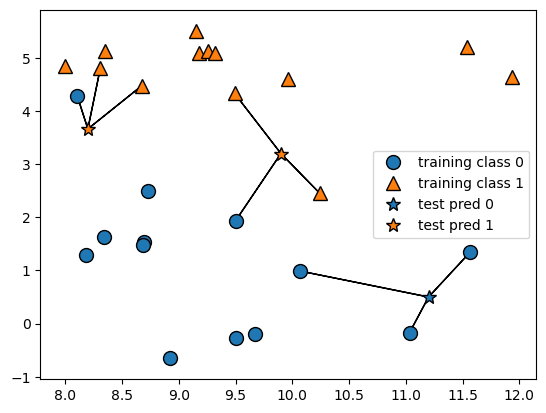

In [22]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNeighborsClassifier 클래스를 임포트하고 객체를 만든다
# 이웃의 수 같은 매개변수를 지정한다
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련 세트를 사용하여 분류 모델을 학습시킨다
# KNeighborsClassifier 학습: 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

# 테스트 데이터에 대해 predict 메서드를 호출하여 예측한다
# 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 데이터를 찾는다
print("테스트 세트 예측:", clf.predict(X_test))
# Output
# 테스트 세트 예측: [1 0 1 0 1 0 0]

# 일반화 평가
# score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출한다
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
# Output
# 테스트 세트 정확도: 0.86
# 86% 정확도; 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


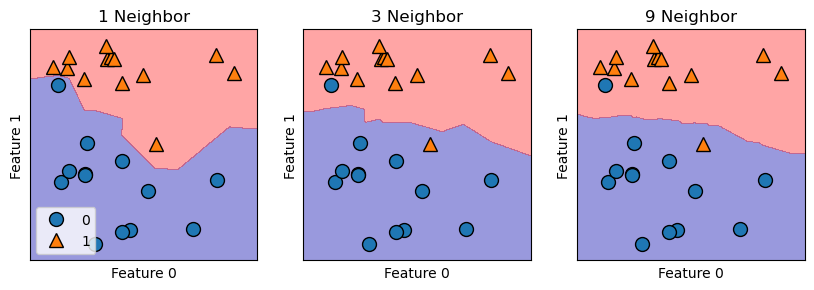

In [24]:
import matplotlib.pyplot as plt


# Decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit: sef 오브젝트를 리턴
  # 객체 생성과 fot 메서드를 한줄에 쓸 수 있다
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  # 결정 경계
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  # 분산도
  mglearn.discrete_scatter(X[:, 0],X[:,1], y,ax=ax)
  # 타이틀 & 레전드
  ax.set_title("{} Neighbor".format(n_neighbors))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)

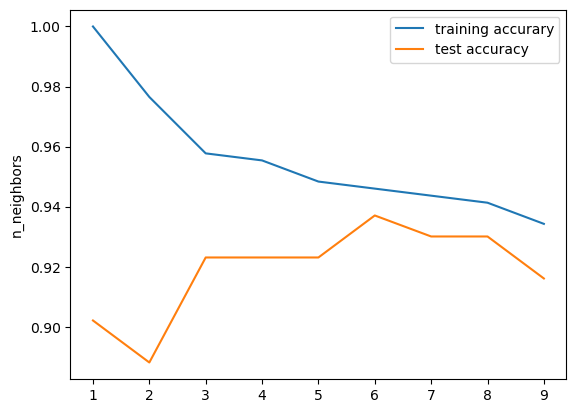

In [25]:
# 유방암 데이터셋을 사용하여 모델의 복잡도와 일반화 사이의 관계를 입증

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify: 기존 데이터를 나누는 것에 그치는 게 아니라, 클래스 분포 비율까지 맞춰준다
# Stratified sampling: 훈련데이터를 나눌 때 무작위로 샘플링을 하되, 클래스 비율이 train, test 세트에도 동일하게 유지되는 것을 보장한다
# https://hyjykelly.tistory.com/44

training_accurary = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accurary.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accurary, label="training accurary")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accurary")
plt.ylabel("n_neighbors")
plt.legend()

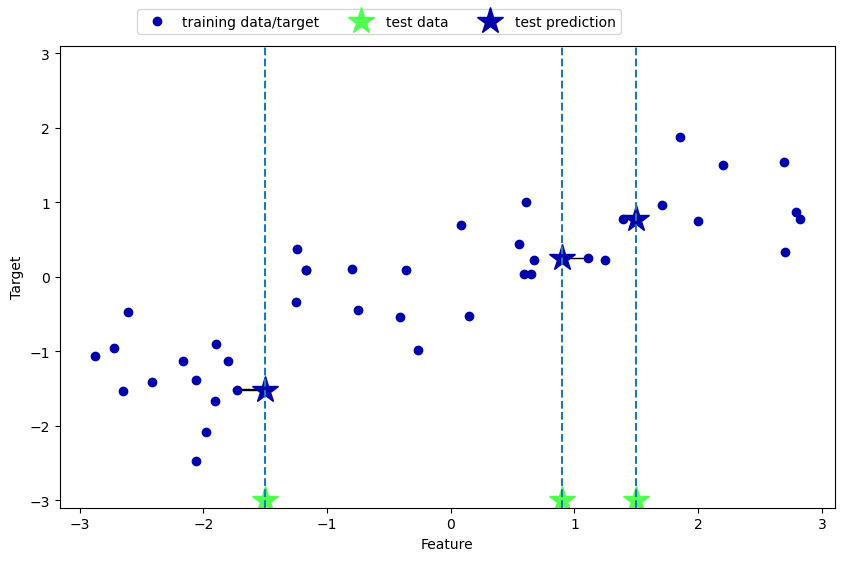

In [26]:
# wave 데이터셋에 대한 1-KNN 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

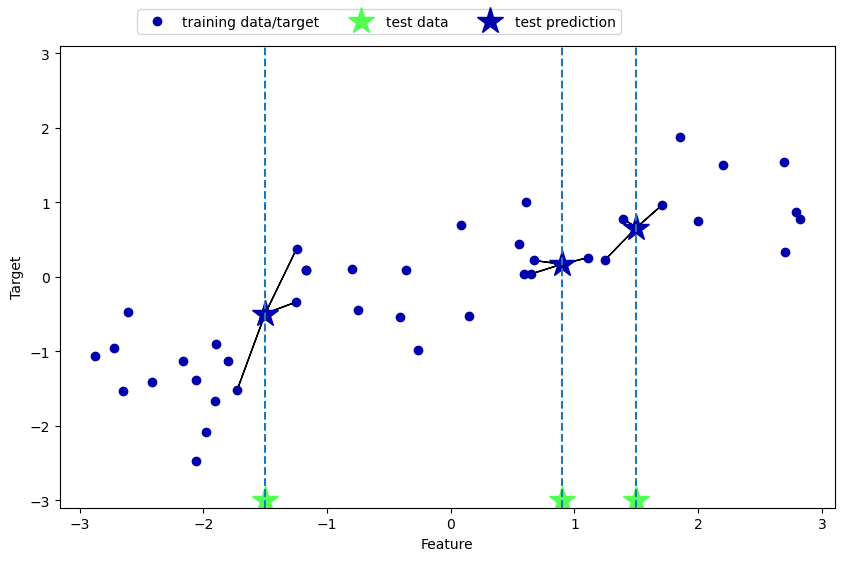

In [27]:
# wave 데이터셋에 대한 3-KNN 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다
reg.fit(X_train, y_train)

# 테스트 세트에 대해 예측을 한다
print("테스트 세트 예측:\n", reg.predict(X_test))

# Output
# 테스트 세트 예측:
# [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382  0.35686046  0.91241374 -0.44680446 -1.13881398]

# score 메서드를 사용하여 모델을 평가할 수 있다
# 회귀 일떄 R^2 를 반환 (0 ~ 1)
# 1: 예측이 완벽한 경우
# 0: 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델
# 음수: 예측과 타깃이 상반되는 경향을 가지는 경우
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

# Output
# 테스트 세트 R^2: 0.83

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


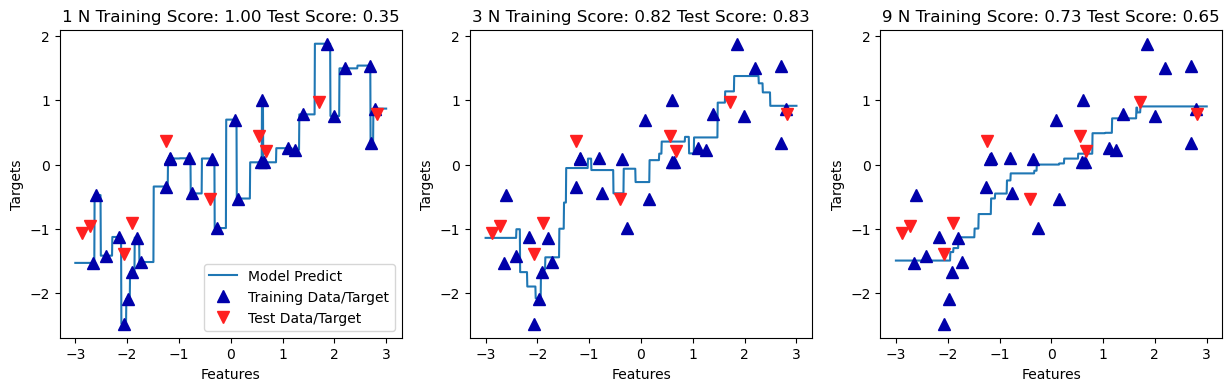

In [31]:
# KNeighborsRegressor 분석

import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1000 개의 데이터 포인트를 만든다

line = np.linspace(-3, 3, 1000).reshape(-1,1)
# numpy.reshape
# Gives a new shape to an array without changing its data.

for n_neighbors, ax in zip([1,3,9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 한다
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
    "{} N Training Score: {:.2f} Test Score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
  )

  ax.set_xlabel("Features")
  ax.set_ylabel("Targets")

axes[0].legend(["Model Predict", "Training Data/Target", "Test Data/Target"], loc="best")

w[0]: 0.393906  b: -0.031804


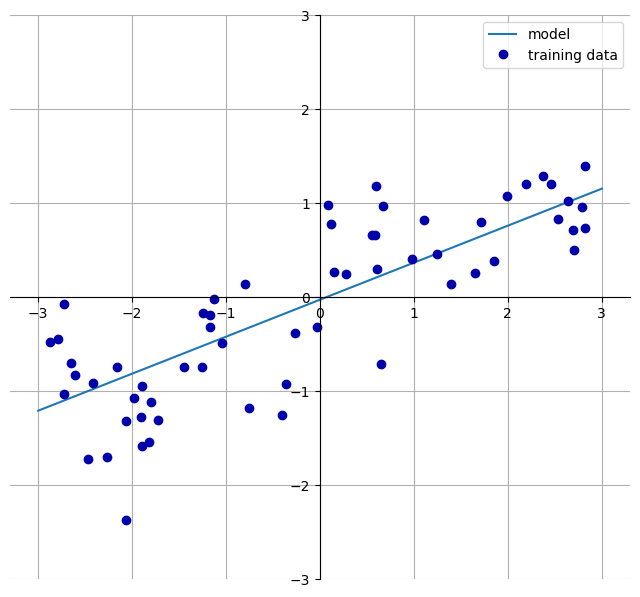

In [32]:
# wave 데이터셋을 사용하여 회귀 선형 모델 학습

mglearn.plots.plot_linear_regression_wave()

In [33]:
# 선형 모델

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# w (weight/coefficient) = lr.coef_
# b (offset/intercept) = lr.intercept_

print("lr.coef_", lr.coef_)
print("lr.intercept_", lr.intercept_)

# output
# lr.coef_ [0.39390555]
# lr.intercept_ -0.031804343026759746

lr.coef_ [0.39390555]
lr.intercept_ -0.031804343026759746


In [34]:
# 훈련 세트와 테스트 세트의 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.67
# 테스트 세트 점수: 0.66

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [35]:
# 복잡한 데이터세트에서의 선형 회귀 모델

# 데이터셋 읽기
X, y = mglearn.datasets.load_extended_boston()

# 훈련/테스트 세트 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 선형 모델 학습
lr = LinearRegression().fit(X_train, y_train)

# 점수 비교 (R^2)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.95
# 테스트 세트 점수: 0.61

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [36]:
# 보스턴 주택가격 데이터셋 + 리지 회귀(`linear_model.Ridge`)
from sklearn.linear_model import Ridge

# 리지 모델 학습
ridge = Ridge().fit(X_train, y_train)

# R^2 점수 조회
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.89
# 테스트 세트 점수: 0.75

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [37]:
# alpha 값이 10일 때 성능

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.79
# 테스트 세트 점수: 0.64

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [38]:
# alpha 값이 0.1일 때 성능

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.93
# 테스트 세트 점수: 0.77

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


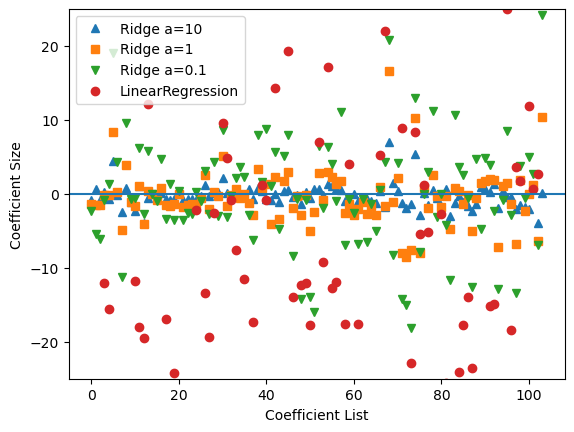

In [39]:
# a 크기에 따른 w(coef_) 값

plt.plot(ridge10.coef_, '^', label="Ridge a=10")
plt.plot(ridge.coef_, 's', label="Ridge a=1")
plt.plot(ridge01.coef_, 'v', label="Ridge a=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

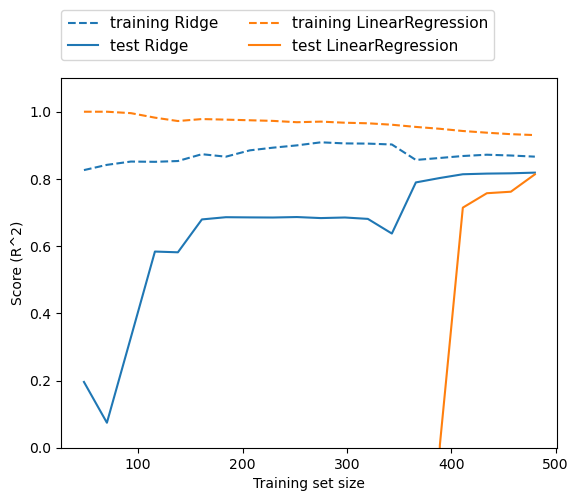

In [40]:
# 보스턴 데이터셋 + 선형 회귀, Ridge 회귀
# 샘플 수에 따른 성능 비교

mglearn.plots.plot_ridge_n_samples()


In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [42]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생한다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

# Output
# 훈련 세트 점수: 0.90
# 테스트 세트 점수: 0.77
# 사용한 특성의 개수: 33

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [43]:
# alpha = 0.0001의 경우 규제 효과가 없어져 선형 회귀와 비슷한 결과를 나타낸다

lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

# Output
# 훈련 세트 점수: 0.95
# 테스트 세트 점수: 0.64
# 사용한 특성의 개수: 96

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, 'W(coef_) Size')

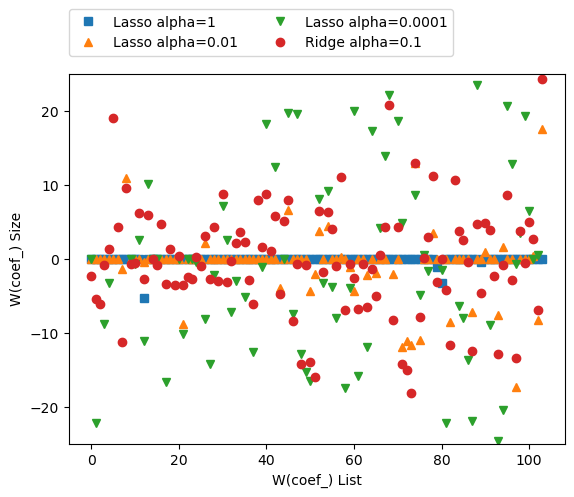

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("W(coef_) List")
plt.ylabel("W(coef_) Size")

d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


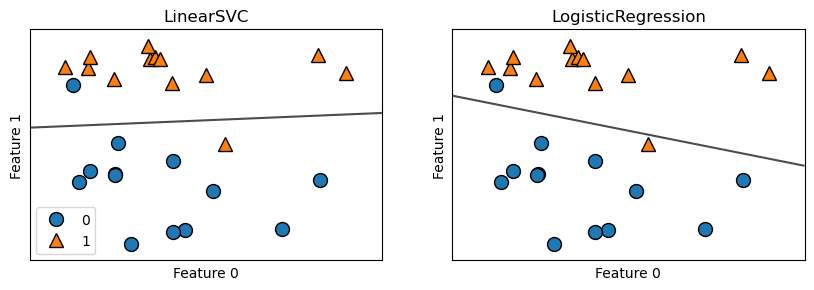

In [45]:
# forge 데이터셋을 사용하여 LogisticRegression 과 LineanerSVC 모델을 만들고, 이 선형 모델들이 만들어낸 결정 경계를 그림으로 표현

import mglearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps =0.5, ax=ax, alpha=0.7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend()


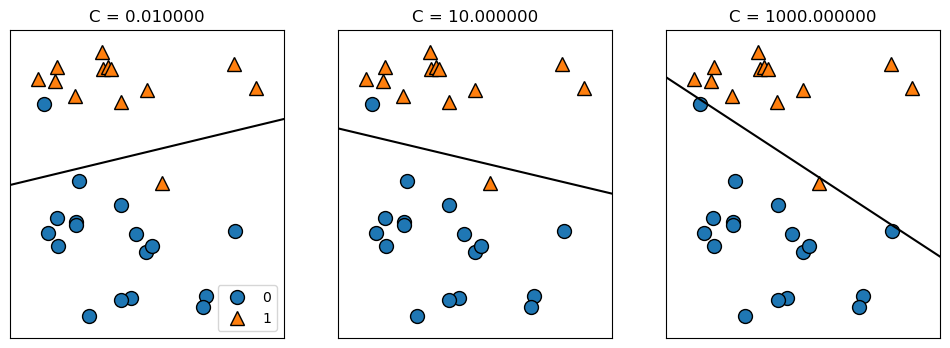

In [46]:
mglearn.plots.plot_linear_svc_regularization()

In [47]:
# 유방암 데이터셋 + LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

longreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(longreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(longreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [48]:
longreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(longreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(longreg100.score(X_test, y_test)))


훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [49]:
longreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(longreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(longreg001.score(X_test, y_test)))


훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


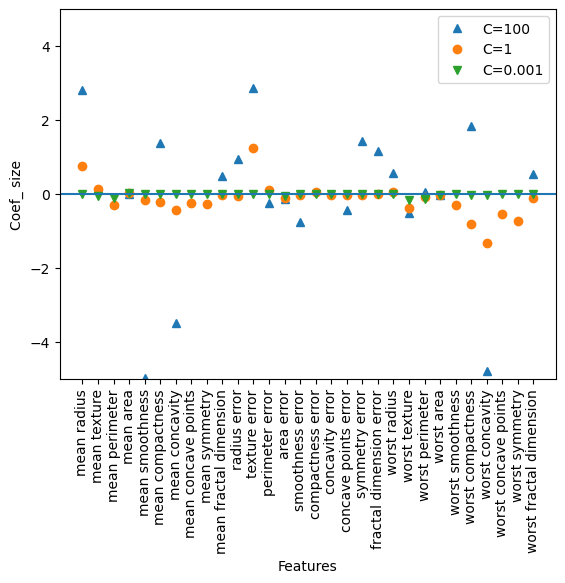

In [50]:
plt.plot(longreg100.coef_.T, '^', label="C=100")
plt.plot(longreg.coef_.T, 'o', label="C=1")
plt.plot(longreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Features")
plt.ylabel("Coef_ size")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


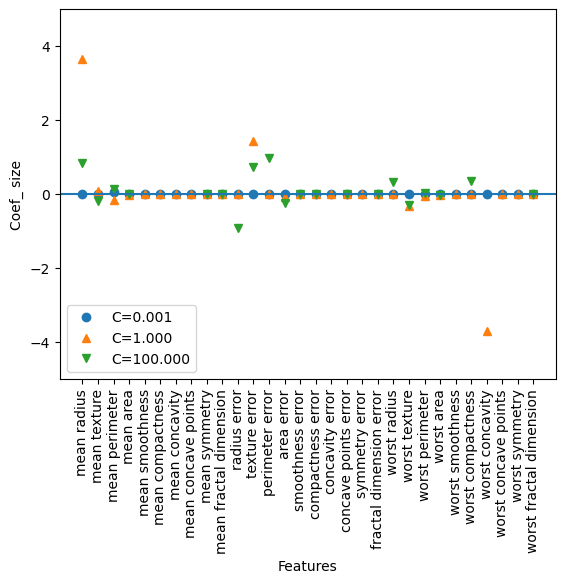

In [51]:
# 유방암 데이터와 L1 규제를 사용하여 각기 다른 C 값을 적용한 로지스틱 회귀 모델의 계수

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
  print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Features")
plt.ylabel("Coef_ size")

plt.ylim(-5, 5)
plt.legend(loc=3)

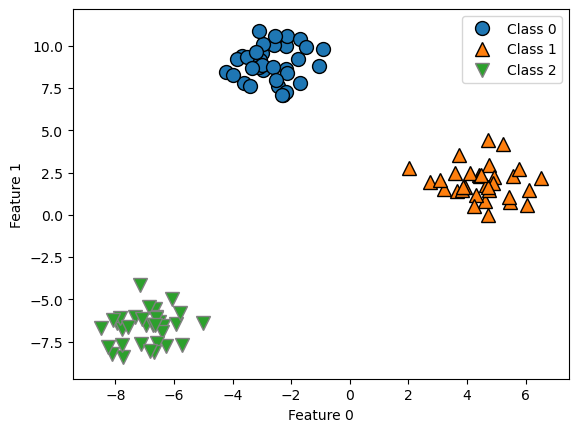

In [52]:
# 세 개의 클래스를 가진 2차원 데이터셋

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [53]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


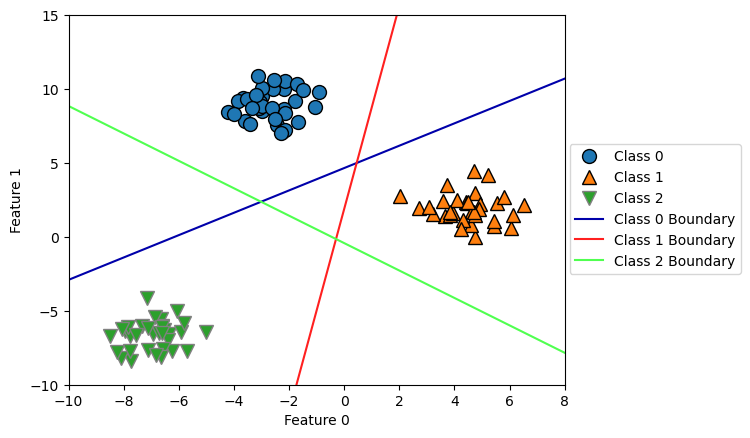

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1','Class 2', 'Class 0 Boundary', 'Class 1 Boundary', 'Class 2 Boundary'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

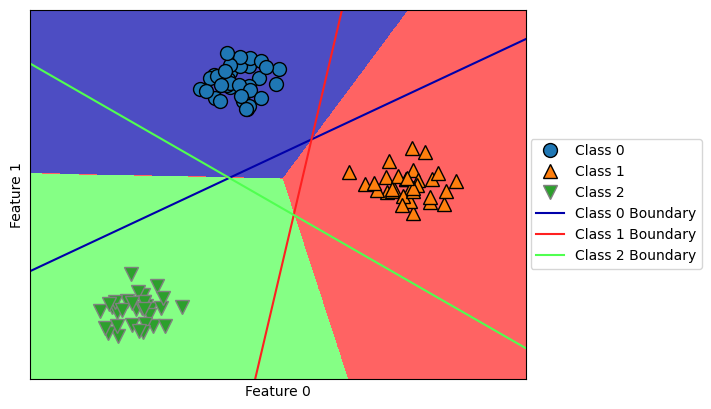

In [55]:
import numpy as np

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.legend(['Class 0', 'Class 1','Class 2', 'Class 0 Boundary', 'Class 1 Boundary', 'Class 2 Boundary'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [56]:
# BernoulliNB
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])

y = np.array([0,1,0,1])

counts = {}

# np.unique(y)
# [0 1]

for label in np.unique(y):
  # 각 클래스에 대해 반봇
  counts[label] = X[y == label].sum(axis=0)
  # print(label, "X[y == label]", X[y == label], X[y == label].sum(axis=0))
  print("y", y) # 출력값
  print("label", label) # 클래스 0 or 1 
  print("y == label", y == label) # 출력값과 클래스가 일치하면 True
  print("X[y == label]", X[y == label]) 
  print("X[y == label].sum(axis=0)", X[y == label].sum(axis=0))
  print("--")

print("특성 카운트:\n", counts)

y [0 1 0 1]
label 0
y == label [ True False  True False]
X[y == label] [[0 1 0 1]
 [0 0 0 1]]
X[y == label].sum(axis=0) [0 1 0 2]
--
y [0 1 0 1]
label 1
y == label [False  True False  True]
X[y == label] [[1 0 1 1]
 [1 0 1 0]]
X[y == label].sum(axis=0) [2 0 2 1]
--
특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [57]:
import numpy as np

X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])

y = np.array([0,1,0,1])
# X[y == label]
# X[y == 1]
# y == 1 # array([False,  True, False,  True])
X[np.array([False,  True, False,  True])]

array([[1, 0, 1, 1],
       [1, 0, 1, 0]])

In [58]:
import mglearn

# mglearn.plots.plot_animal_tree()

In [59]:
# 유방암 데이터셋을 이용하여 사전 가지치기의 효과를 분석
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [60]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [61]:
# 결정 트리 분석
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Negative", "Postivie"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [62]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

# PDF
# display(graphviz.Source(dot_graph))

# dot = graphviz.Source(dot_graph)
# dot.format = 'png'
# png 파일로 저장
# dot.render(filename='tree.png')


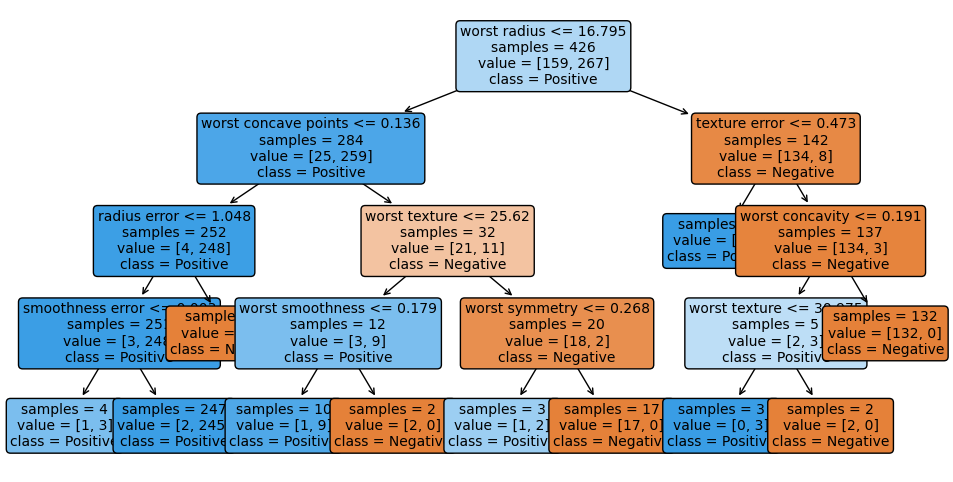

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["Negative", "Positive"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [80]:
print("특성 중요도:\n:", tree.feature_importances_)

특성 중요도:
: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


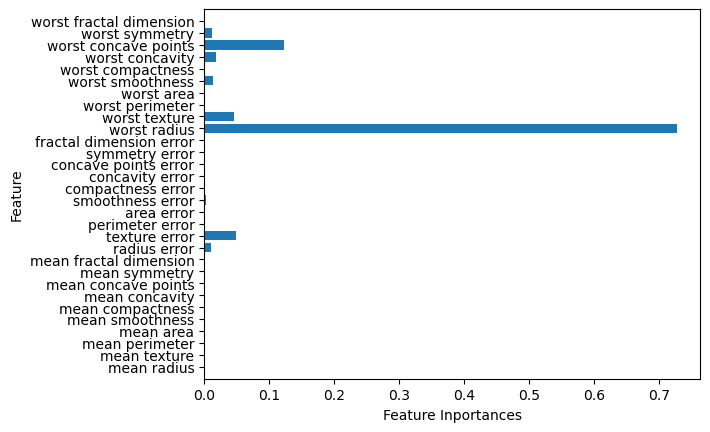

In [83]:
def plot_feaeture_infortances_cancer(model):
  n_featrues = cancer.data.shape[1]
  plt.barh(np.arange(n_featrues), model.feature_importances_, align="center")
  plt.yticks(np.arange(n_featrues), cancer.feature_names)
  plt.xlabel("Feature Inportances")
  plt.ylabel("Feature")
  plt.ylim(-1, n_featrues)


plot_feaeture_infortances_cancer(tree)

Feature importances: [0. 1.]


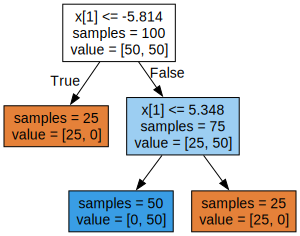

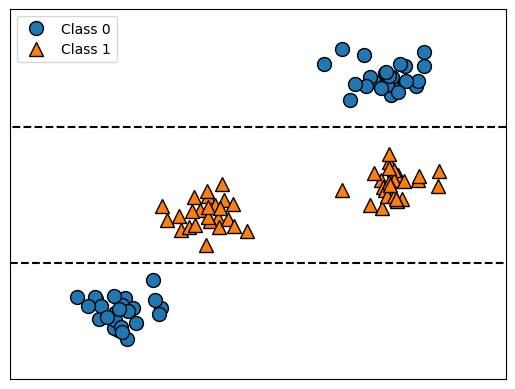

In [84]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, 'Price ($/Mbyte)')

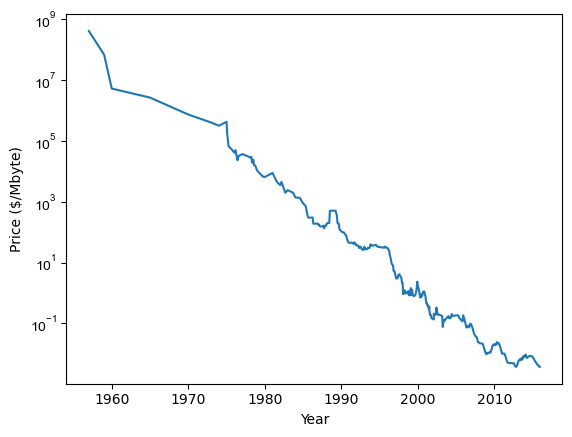

In [89]:
#컴퓨터 메모리 가격 동향 데이터셋

import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

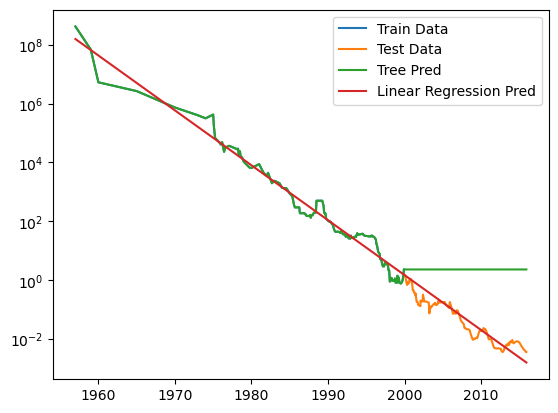

In [93]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용한다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행한다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Pred")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Pred")
plt.legend()

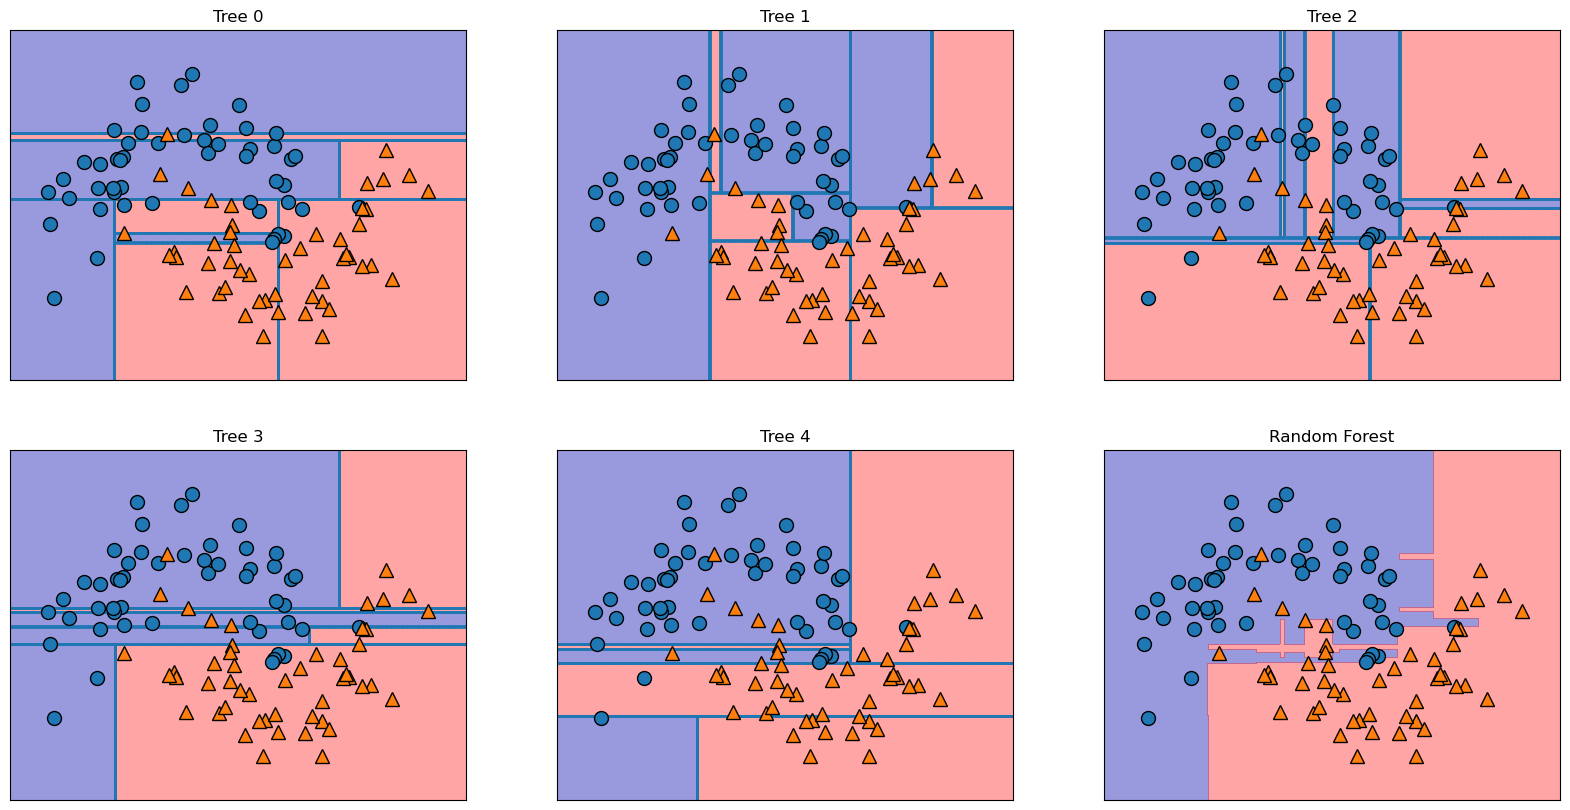

In [99]:
# two_moon 데이터셋 - 5개의 트리로 구성된 랜덤포레스트 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 랜던 포레스트 안에 만들어진 트리는 estimators_ 속성에 저장된다

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [101]:
# 유방암 데이터셋 + 100개의 트리로 이뤄진 랜덤 포레스트

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: 0.97


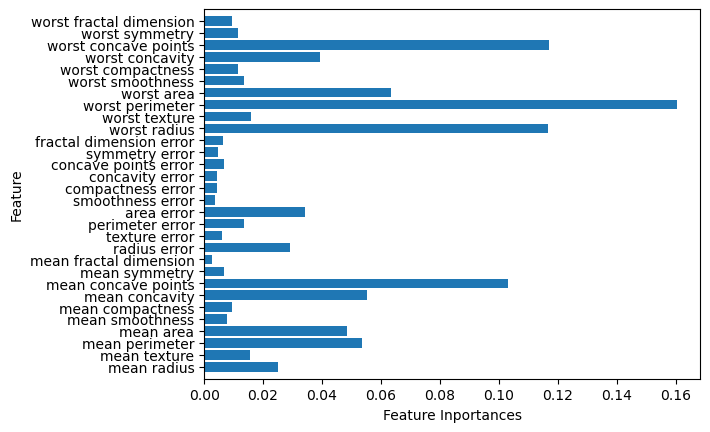

In [102]:
plot_feaeture_infortances_cancer(forest)

In [103]:
# 유방암 데이터셋 + GradientBoostingClassifier
# (depth: 3, n_estimators: 100, learning_rate: 0.1)

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Gradient Boosted Regression Trees
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(gbrt.score(X_test, y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: 0.97


In [107]:
# 훈련 세트 정확도가 100% 이기 때문에 과대적합을 의심할 수 있다
# 과대적합을 막기 위해 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다.

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("최대 깊이를 1로 낮춘 경우")
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습률을 0.01로 낮춘 경우")
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

최대 깊이를 1로 낮춘 경우
훈련 세트 점수: 0.991
테스트 세트 점수: 0.972
학습률을 0.01로 낮춘 경우
훈련 세트 점수: 0.988
테스트 세트 점수: 0.965


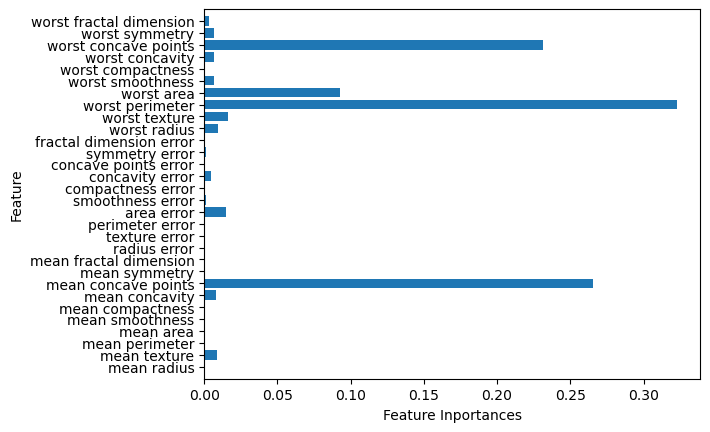

In [108]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feaeture_infortances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

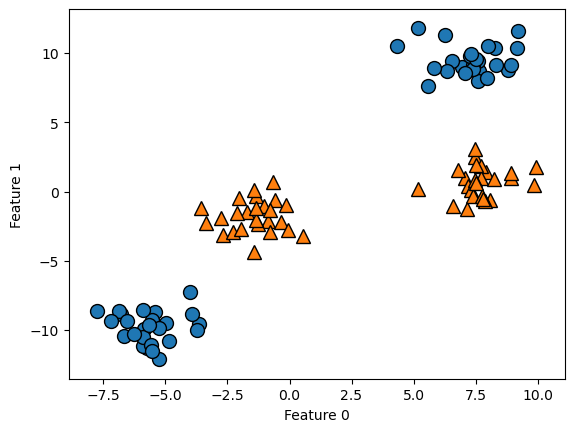

In [6]:
from sklearn.datasets import make_blobs
from mglearn import discrete_scatter
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

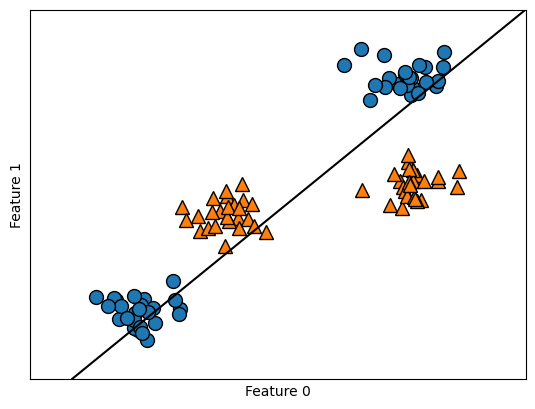

In [8]:
import mglearn
from sklearn.svm import LinearSVC


linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'Feature 1 ** 2')

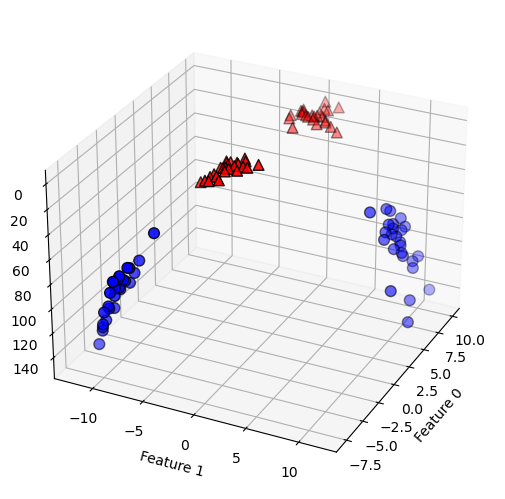

In [13]:
import numpy as np
import matplotlib

# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

if matplotlib.__version__ > '3.4':
  # Axes3D가 자동으로 그림에 추가되는 방식은 3.4 버번에서 deprecated 되었다
  # 이 경고를 피하려면 auto_add_to_figure=False 를 지정하고
  # figure.add_axes(ax)로 직접 추가
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그린다
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')


ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


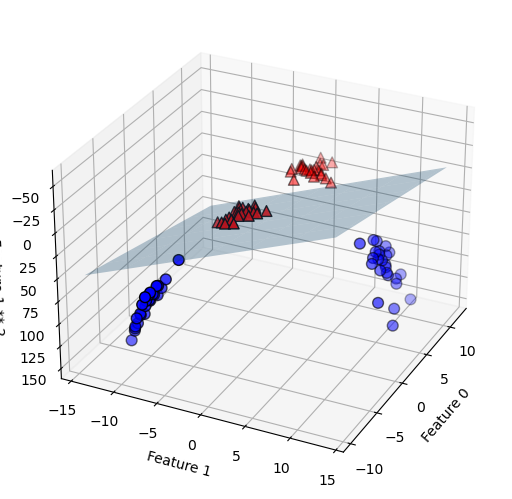

In [20]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()

if matplotlib.__version__ > '3.4':
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")


linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

Text(0, 0.5, 'Feature 1')

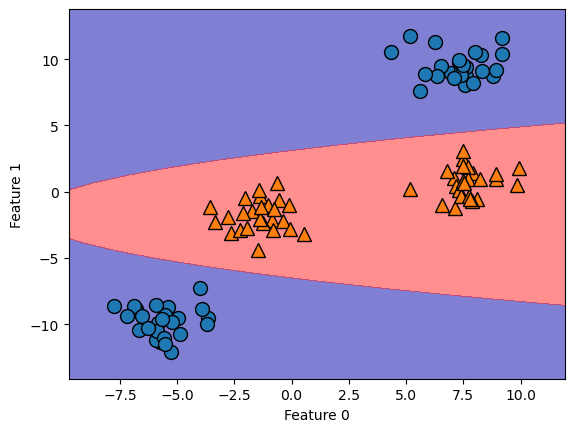

In [21]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'Feature 1')

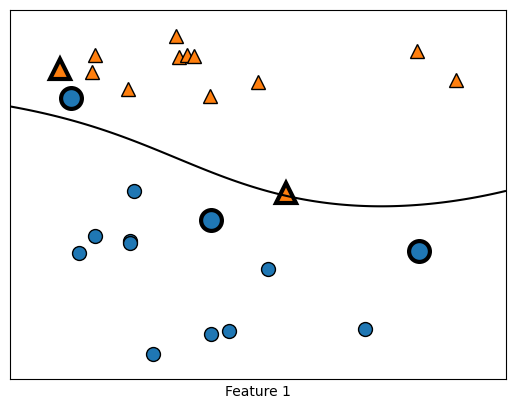

In [23]:
# RBF 커널을 사용한 SVM으로 만든 결정 경계와 서포트 벡터

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 벡터의 클래스 레이블이 결정된다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")



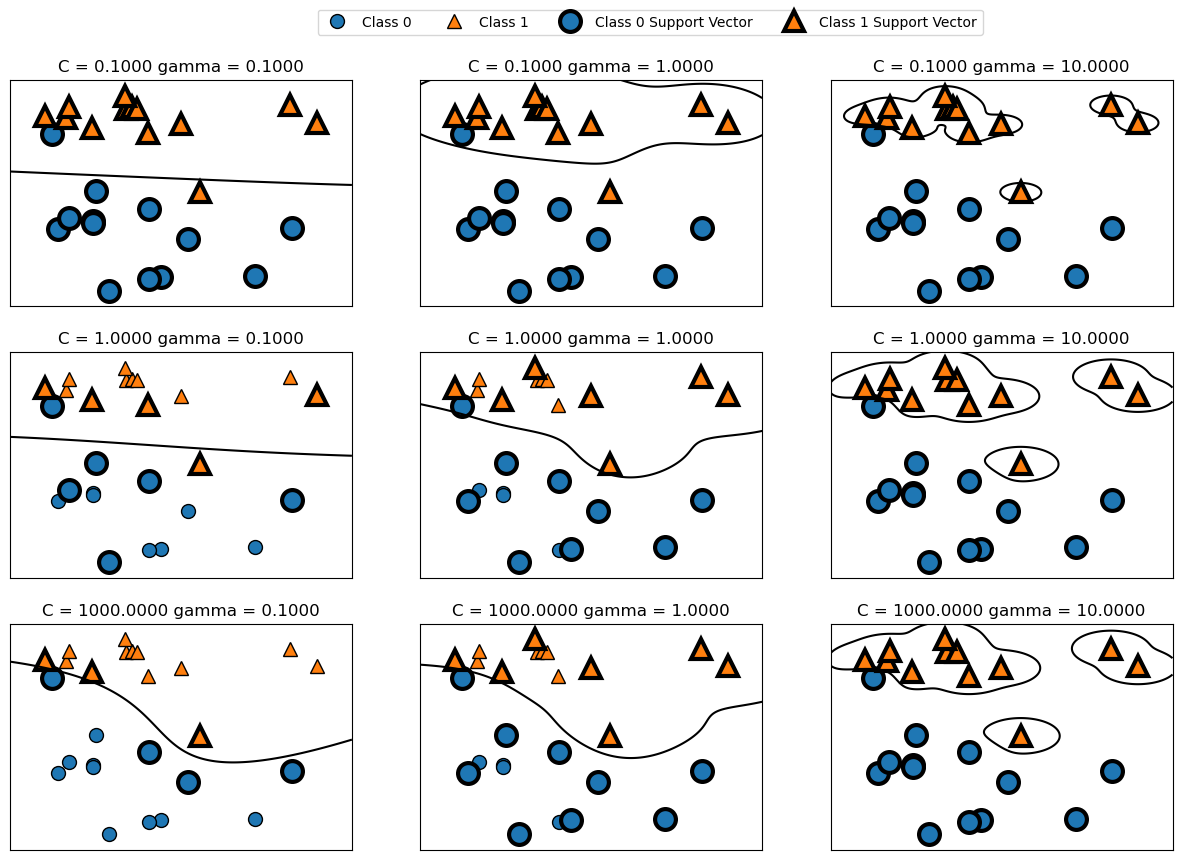

In [26]:
# C 와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

In [30]:
# RBF 커널 SVM 유방암 데이터셋에 적용
# 기본값: C = 1, gamma = 1/n_features

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))



훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, 'Feature Size')

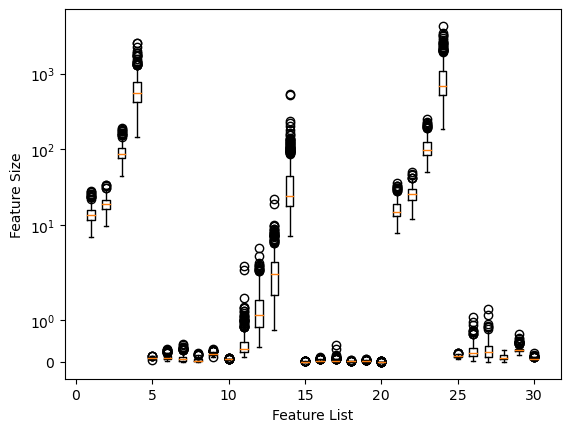

In [32]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel("Feature List")
plt.ylabel("Feature Size")

In [38]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값-최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위를 나누면
# 각 특성에 대해 최솟값은 0 최갯값은 1이다
X_train_scaled = (X_train - min_on_training) /  range_on_training
print("특성별 최솟값\n:", X_train_scaled.min(axis=0))
print("특성별 최댓값\n:", X_train_scaled.max(axis=0))

# 특성별 최솟값
# : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0. 0.]
# 특성별 최댓값
# : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
#  1. 1. 1. 1. 1. 1.]

# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용한다
X_test_scaled = (X_test - min_on_training) /  range_on_training

sv = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))

# Out
# 훈련 세트 정확도: 0.98
# 테스트 세트 정확도: 0.97




특성별 최솟값
: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 세트 정확도: 0.98
테스트 세트 정확도: 0.97


In [39]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))

# Output
# 훈련 세트 정확도: 0.99
# 테스트 세트 정확도: 0.98


훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.98
